In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Employee.csv")

In [5]:
print(df.head())

   Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [14]:
df.describe(include='all')

,Company,Age,Salary,Place,Country,Gender
count,140,130.000000,124.000000,134,148,148.000000
unique,6,NaN,NaN,11,1,NaN
top,TCS,NaN,NaN,Mumbai,India,NaN
freq,53,NaN,NaN,37,148,NaN
mean,NaN,30.484615,5312.467742,NaN,NaN,0.222973
std,NaN,11.096640,2573.764683,NaN,NaN,0.417654
min,NaN,0.000000,1089.000000,NaN,NaN,0.000000
25%,NaN,22.000000,3030.000000,NaN,NaN,0.000000
50%,NaN,32.500000,5000.000000,NaN,NaN,0.000000
75%,NaN,37.750000,8000.000000,NaN,NaN,0.000000


In [16]:
print(df.isnull().sum())

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64


In [24]:
unique_counts = {}
for col in df.columns:
    unique_values = df[col].unique()
    unique_counts[col] = len(unique_values)
    print(f"Column: {col}")
    print(f"Unique Values: {unique_values}") 
    print(f"Total Unique Count: {len(unique_values)}\n")
print("Unique Value Counts per Column:", unique_counts)

Column: Company
Unique Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Total Unique Count: 7

Column: Age
Unique Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Total Unique Count: 30

Column: Salary
Unique Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Total Unique Count: 41

Column: Place
Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Total Unique Count: 12

Column: Country
Unique Values: ['India']
Total Unique Count: 1

Column: Gender
Unique Values: [0 1]
Total Unique Count: 2

Unique Value Counts per Column: {'Company': 7, 'Age': 30, 'Salary': 41, 'Place': 12, 'Count

In [32]:
df.rename(columns={
    'Company': 'company_name',
    'Age': 'employee_age',
    'Salary': 'employee_salary',
    'Place': 'work_location',
    'Country': 'country',
    'Gender': 'gender'
}, inplace=True)
print("Renamed Columns:", df.columns)

Renamed Columns: Index(['company_name', 'employee_age', 'employee_salary', 'work_location',
       'country', 'gender'],
      dtype='object')


# Data Cleaning

In [30]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 company_name        8
employee_age       18
employee_salary    24
work_location      14
country             0
gender              0
dtype: int64


In [36]:
df.drop_duplicates(inplace=True)
print(f"Duplicate Rows: {df.duplicated().sum()}")

Duplicate Rows: 0


In [44]:
df['employee_age'] = df['employee_age'].replace(0, np.nan)
df['employee_age'] 

0      20.0
1      30.0
2      35.0
3      40.0
4      23.0
       ... 
142    22.0
143    33.0
145    44.0
146    33.0
147    22.0
Name: employee_age, Length: 144, dtype: float64

### Age

In [48]:
df['employee_age'].isnull().sum()

23

In [54]:
df['employee_age'].fillna(df['employee_age'].median(),inplace=True)

In [73]:
df['employee_age'].isnull().sum()

0

### Company name

In [58]:
df['company_name'].isnull().sum()

8

In [62]:
df['company_name'].fillna("Unknown", inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_29016\2920000871.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['company_name'].fillna("Unknown", inplace=True)


In [64]:
df['company_name'].isnull().sum()

0

### Work location

In [67]:
df['work_location'].isnull().sum()

14

In [69]:
df['work_location'].fillna("Unknown", inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_29016\948510740.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['work_location'].fillna("Unknown", inplace=True)


In [71]:
df['work_location'].isnull().sum()

0

### Salary

In [76]:
df['employee_salary'].isnull().sum()

23

In [78]:
df['employee_salary'].fillna(df['employee_salary'].median(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_29016\3200821923.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['employee_salary'].fillna(df['employee_salary'].median(), inplace=True)


In [80]:
df['employee_salary'].isnull().sum()

0

In [82]:
df.isnull().sum()

company_name       0
employee_age       0
employee_salary    0
work_location      0
country            0
gender             0
dtype: int64

### Saving the cleaned data

In [85]:
df.to_csv("Employee_Cleaned.csv", index=False)

In [87]:
df.isnull().sum()

company_name       0
employee_age       0
employee_salary    0
work_location      0
country            0
gender             0
dtype: int64

# Data Analysis

In [91]:
df = pd.read_csv("Employee_Cleaned.csv")

In [97]:
filtered_df = df[(df['employee_age'] > 40) & (df['employee_salary'] < 5000)]
print(filtered_df)

    company_name  employee_age  employee_salary work_location country  gender
21       Infosys          50.0           3184.0         Delhi   India       0
32       Infosys          45.0           4034.0      Calcutta   India       0
39       Infosys          41.0           3000.0        Mumbai   India       0
50       Infosys          41.0           3000.0       Chennai   India       0
57       Infosys          51.0           3184.0     Hyderabad   India       0
68       Infosys          43.0           4034.0        Mumbai   India       0
75       Infosys          44.0           3000.0        Cochin   India       0
85       Infosys          41.0           3000.0         Delhi   India       0
92       Infosys          54.0           3184.0        Mumbai   India       0
103      Infosys          44.0           4034.0         Delhi   India       0
121      Infosys          44.0           3234.0        Mumbai   India       0
128      Infosys          50.0           3184.0      Calcutta   

In [101]:
df[df['gender'] ==0]

,company_name,employee_age,employee_salary,work_location,country,gender
0,TCS,20.0,5000.0,Chennai,India,0
1,Infosys,30.0,5000.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
136,Congnizant,22.0,2934.0,Noida,India,0
137,Infosys,44.0,4034.0,Hyderabad,India,0
138,TCS,33.0,5034.0,Calcutta,India,0
139,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0


In [103]:
filtered_df.describe()

,employee_age,employee_salary,gender
count,15.000000,15.000000,15.000000
mean,45.333333,3411.533333,0.066667
std,3.994043,462.651808,0.258199
min,41.000000,3000.000000,0.000000
25%,43.500000,3016.500000,0.000000
50%,44.000000,3184.000000,0.000000
75%,47.500000,4034.000000,0.000000
max,54.000000,4034.000000,1.000000


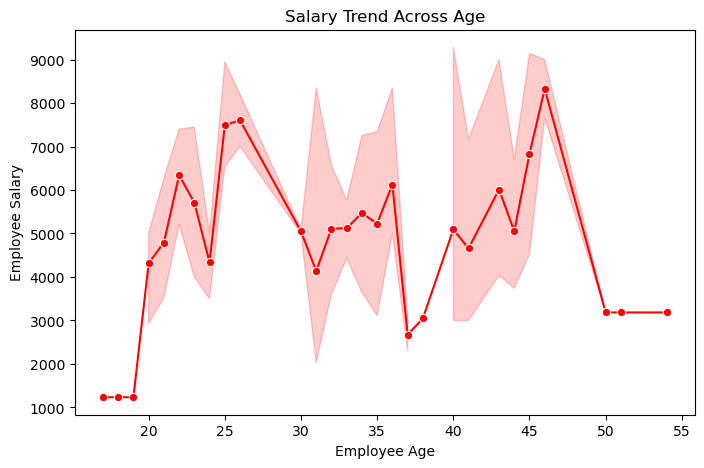

In [107]:
plt.figure(figsize=(8,5))
sns.lineplot(x=df['employee_age'], y=df['employee_salary'], color='red', marker='o')
plt.xlabel("Employee Age")
plt.ylabel("Employee Salary")
plt.title("Salary Trend Across Age")
plt.show()

In [111]:
place_counts = df['work_location'].value_counts()
print(place_counts)

work_location
Mumbai        34
Calcutta      32
Chennai       14
Delhi         14
Unknown       14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64


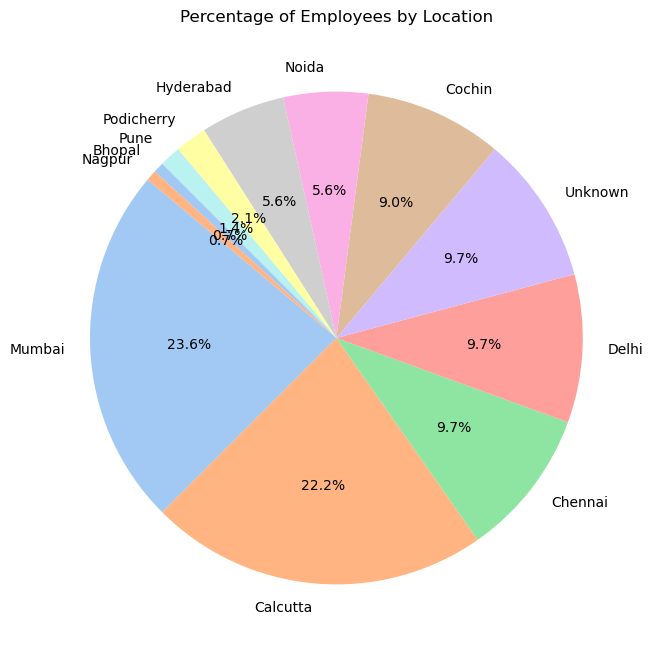

In [113]:
plt.figure(figsize=(8,8))
plt.pie(place_counts, labels=place_counts.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"), startangle=140)
plt.title("Percentage of Employees by Location")
plt.show()

### Data Encoding

In [116]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['company_name', 'work_location', 'country'], dtype='object')


In [118]:
df = pd.get_dummies(df, columns=['company_name', 'work_location', 'country'], drop_first=True)

In [120]:
df

,employee_age,employee_salary,gender,company_name_Congnizant,company_name_Infosys,company_name_Infosys Pvt Lmt,company_name_TCS,company_name_Tata Consultancy Services,company_name_Unknown,work_location_Calcutta,work_location_Chennai,work_location_Cochin,work_location_Delhi,work_location_Hyderabad,work_location_Mumbai,work_location_Nagpur,work_location_Noida,work_location_Podicherry,work_location_Pune,work_location_Unknown
0,20.0,5000.0,0,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
1,30.0,5000.0,0,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,35.0,2300.0,0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
3,40.0,3000.0,0,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,23.0,4000.0,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,22.0,8202.0,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
140,33.0,9024.0,1,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
141,44.0,4034.0,1,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
142,33.0,5034.0,1,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False


In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])  

In [126]:
df.head()

,employee_age,employee_salary,gender,company_name_Congnizant,company_name_Infosys,company_name_Infosys Pvt Lmt,company_name_TCS,company_name_Tata Consultancy Services,company_name_Unknown,work_location_Calcutta,work_location_Chennai,work_location_Cochin,work_location_Delhi,work_location_Hyderabad,work_location_Mumbai,work_location_Nagpur,work_location_Noida,work_location_Podicherry,work_location_Pune,work_location_Unknown
0,20.0,5000.0,0,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
1,30.0,5000.0,0,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,35.0,2300.0,0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
3,40.0,3000.0,0,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,23.0,4000.0,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   employee_age                            144 non-null    float64
 1   employee_salary                         144 non-null    float64
 2   gender                                  144 non-null    int64  
 3   company_name_Congnizant                 144 non-null    bool   
 4   company_name_Infosys                    144 non-null    bool   
 5   company_name_Infosys Pvt Lmt            144 non-null    bool   
 6   company_name_TCS                        144 non-null    bool   
 7   company_name_Tata Consultancy Services  144 non-null    bool   
 8   company_name_Unknown                    144 non-null    bool   
 9   work_location_Calcutta                  144 non-null    bool   
 10  work_location_Chennai                   144 non-null    bool  

### Feature scaling

In [131]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns to Scale:", numerical_cols)

Numerical Columns to Scale: ['employee_age', 'employee_salary', 'gender']


In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df_standardized.head())

   employee_age  employee_salary    gender  company_name_Congnizant  \
0     -1.484676        -0.100827 -0.534522                    False   
1     -0.267174        -0.100827 -0.534522                    False   
2      0.341577        -1.243735 -0.534522                    False   
3      0.950328        -0.947426 -0.534522                    False   
4     -1.119426        -0.524127 -0.534522                    False   

   company_name_Infosys  company_name_Infosys Pvt Lmt  company_name_TCS  \
0                 False                         False              True   
1                  True                         False             False   
2                 False                         False              True   
3                  True                         False             False   
4                 False                         False              True   

   company_name_Tata Consultancy Services  company_name_Unknown  \
0                                   False              

In [135]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numerical_cols] = minmax_scaler.fit_transform(df[numerical_cols])
print(df_minmax.head())

   employee_age  employee_salary  gender  company_name_Congnizant  \
0      0.081081         0.445089     0.0                    False   
1      0.351351         0.445089     0.0                    False   
2      0.486486         0.137817     0.0                    False   
3      0.621622         0.217480     0.0                    False   
4      0.162162         0.331285     0.0                    False   

   company_name_Infosys  company_name_Infosys Pvt Lmt  company_name_TCS  \
0                 False                         False              True   
1                  True                         False             False   
2                 False                         False              True   
3                  True                         False             False   
4                 False                         False              True   

   company_name_Tata Consultancy Services  company_name_Unknown  \
0                                   False                 False   
